Data set is supposed to be
* Sophie stays steady for a bit
* Sophie walks around a bit
* steadyishc
* Sophie jumps up and down a bunch
* pause
* (fiddling with it)

Board +x is "down-ish", +y is to the right, +z is out her back (right handed coordinate systyem, whem)

In [1]:
import numpy as np
from scipy.spatial.transform import Rotation

import pandas as pd

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
ACCEL_SCALING = 2 * 2**-15 # +/-2 G in an i16

In [4]:
data = pd.read_csv('dump_sophietest2_walk_then_jump.csv')
data

,TIME,qw,qx,qy,qz,gyro_x,gyro_y,gyro_z,accel_x,accel_y,accel_z,REMINFIFO
0,0.918060,16201,-17,2430,-225,-14986,2772,-4526,-173,-39,-50,0
1,0.918060,16192,-21,2486,-225,-14862,2786,-4522,-181,-34,-50,0
2,0.918060,16183,-27,2542,-225,-15108,2776,-4466,-184,-29,-56,0
3,0.918060,16174,-33,2600,-225,-15104,2592,-4638,-195,-20,-55,0
4,0.918060,16165,-41,2657,-225,-15178,2560,-4480,-208,-20,-53,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5563,56.473358,368,-12536,-6723,8122,-12446,-7988,-7524,-58,24,-104,0
5564,56.473358,373,-12533,-6731,8120,-12408,-7858,-7718,-41,33,-92,0
5565,56.473358,376,-12529,-6737,8120,-12334,-7698,-7604,-29,26,-75,0
5566,56.473358,379,-12527,-6742,8120,-12508,-7632,-7440,-24,22,-56,0


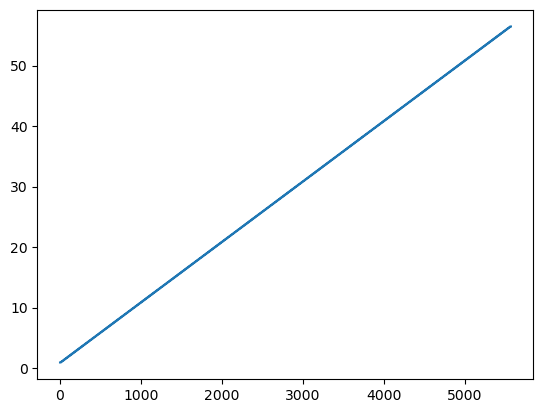

In [5]:
t = np.array(data['TIME'])
plt.plot(t)

Try evenly interpolating the time...

(55.51339721679688, 56.47335815429688)

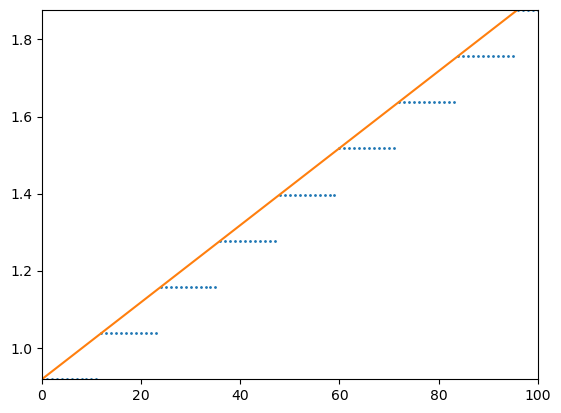

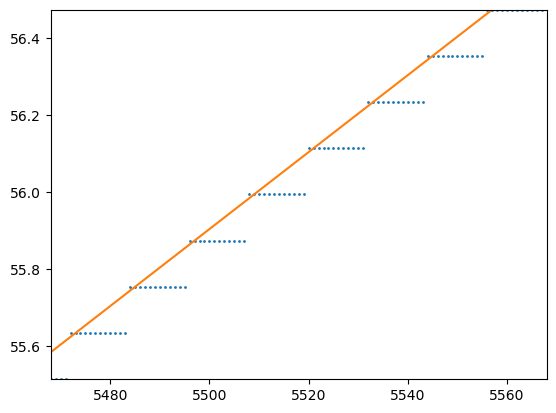

In [6]:
test = np.linspace(t[0], t[-1]+.1, len(t))

plt.figure()
plt.scatter(np.arange(len(t)), t, s=1, c='C0')
plt.plot(np.arange(len(test)), test, c='C1')
plt.xlim(0, 100)
plt.ylim(t[0], t[100])


plt.figure()
plt.scatter(np.arange(len(t)), t, s=1, c='C0')
plt.plot(np.arange(len(test)), test, c='C1')
plt.xlim(len(t)-100, len(t))
plt.ylim(t[-100], t[-1])

In [7]:
ax = ACCEL_SCALING*np.array(data['accel_x'])
ay = ACCEL_SCALING*np.array(data['accel_y'])
az = ACCEL_SCALING*np.array(data['accel_z'])
atot = (ax*ax + ay*ay + az*az)**0.5
atot

array([0.01124605, 0.01164748, 0.01187177, ..., 0.0051581 , 0.00395365,
       0.00181471])

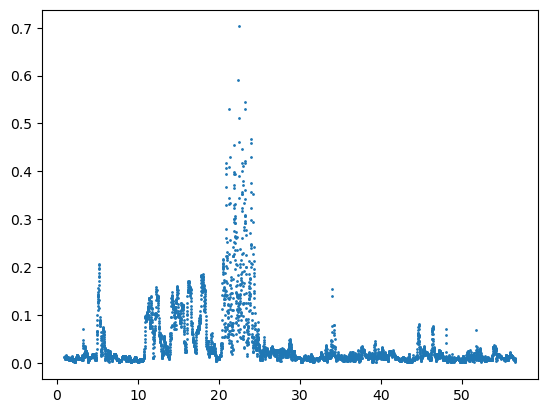

In [8]:
plt.scatter(test, atot, s=1)

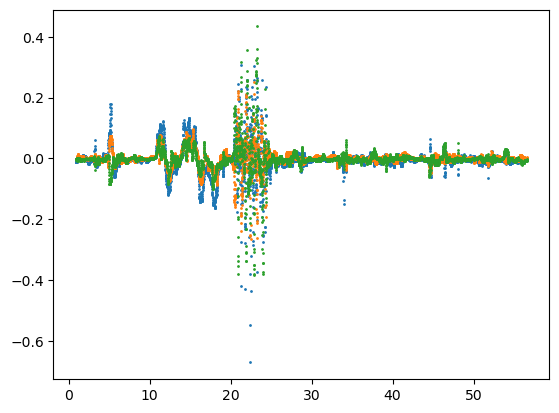

In [9]:
plt.scatter(test, ax, s=1)
plt.scatter(test, ay, s=1)
plt.scatter(test, az, s=1);

(15.0, 22.0)

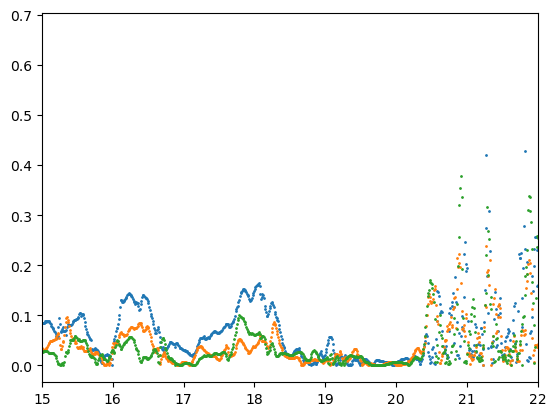

In [10]:
plt.scatter(test, np.abs(ax), s=1)
plt.scatter(test, np.abs(ay), s=1)
plt.scatter(test, np.abs(az), s=1)

plt.xlim(15, 22)

Gyro, just out of curiosity

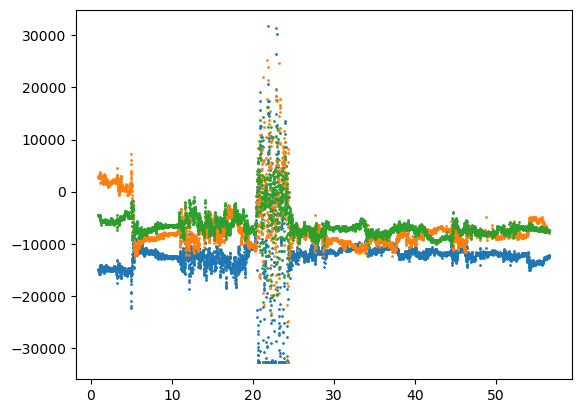

In [11]:
plt.scatter(test, data['gyro_x'], s=1)
plt.scatter(test, data['gyro_y'], s=1)
plt.scatter(test, data['gyro_z'], s=1)

In [12]:
1/np.diff(test)

array([100.02641644, 100.02641644, 100.02641644, ..., 100.02641644,
       100.02641644, 100.02641644])

It's supposed to be 100 Hz so that adds up

In [13]:
q = np.array([data['qw'], data['qx'], data['qy'], data['qz']])*2**-14
np.sum(q*q.astype(float),axis=0)**0.5

array([0.99998651, 0.99995654, 0.99993881, ..., 1.0000062 , 1.00004261,
       0.99999109])

the quaternions are normalized at 2**&-14? Odd.  But maybe it's the acceperation scaling?

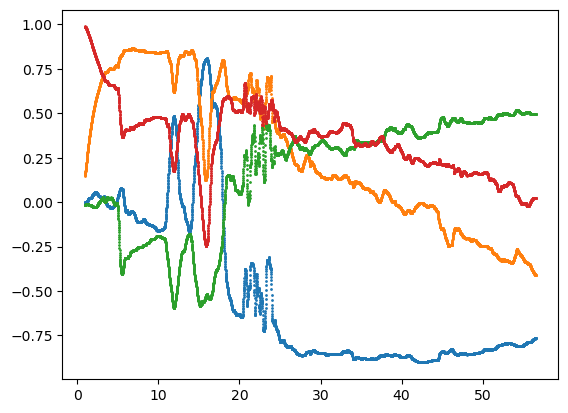

In [14]:
plt.scatter(test, q[1], s=1)
plt.scatter(test, q[2], s=1)
plt.scatter(test, q[3], s=1)
plt.scatter(test, q[0], s=1)

In [15]:
r = Rotation.from_quat(q.T)

# Identify jumping

First try rotating the accel vector using the quarternion to try to figure out jumping up vs other accelerations:

### No transform

pre-jump segment
mean of abs 0.05857609340122768 0.03184803553989955 0.024484688895089285
med of abs 0.06182861328125 0.02984619140625 0.020294189453125
std 0.06409294898346325 0.0354110836035967 0.029545249570407328
jump segment
mean of abs 0.05903135027204241 0.03769967215401786 0.03473499843052456
med of abs 0.04052734375 0.02435302734375 0.020355224609375
std 0.06929833285160036 0.05252430447828739 0.058537776682020516
spin segment
mean of abs 0.0076157948975044566 0.00511770537405303 0.006452101437165776
med of abs 0.006103515625 0.00439453125 0.0040283203125
std 0.010048643637276533 0.006694010539039504 0.009178792674965276


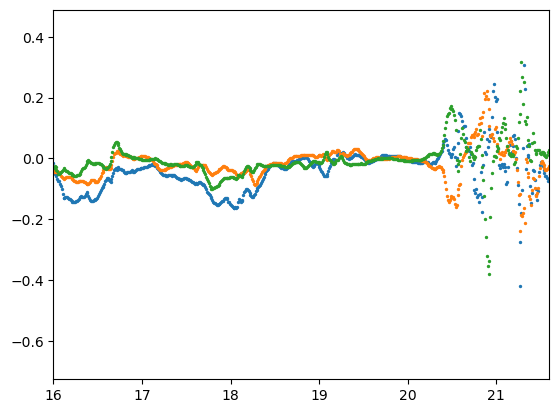

In [16]:
av = np.array([ax, ay, az])
axp, ayp, azp = av
plt.scatter(test, axp, s=2, c='C0')
plt.scatter(test, ayp, s=2, c='C1')
plt.scatter(test, azp, s=2, c='C2')

plt.xlim(16, 21.6)
msk = ((16+16-21.6)<test)&(test <16)
print('pre-jump segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

msk = (16<test)&(test <21.6)
print('jump segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

msk = (28<test)&(test<(28+(21.6-16)))
print('spin segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

### Inverse=True

pre-jump segment
mean of abs 0.021509551833977795 0.03963850103485387 0.046667192968799134
med of abs 0.01872574772837016 0.026550638853439664 0.03608884004803839
std 0.02607303391229654 0.05149440652690096 0.05953156256818002
jump segment
mean of abs 0.035283829704858216 0.04719482558217558 0.04309671331613084
med of abs 0.018320385304592207 0.0359519005224693 0.02059691405006384
std 0.06479296868800524 0.0626229607901866 0.066251018971394
spin segment
mean of abs 0.007204310290606247 0.005723664653235424 0.007232060736184415
med of abs 0.005957841342136697 0.004575661552460851 0.005281792041524847
std 0.009079456728586077 0.007225614976751843 0.009687404026682738


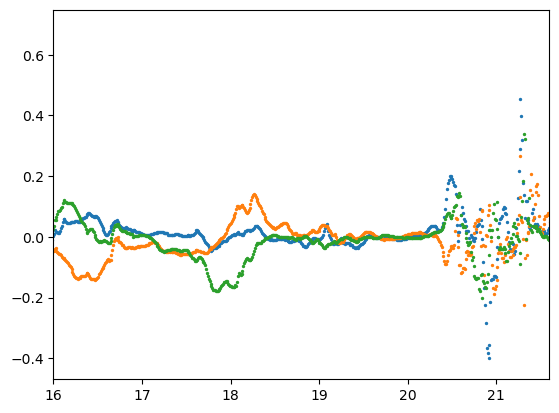

In [17]:
av = np.array([ax, ay, az])
axp, ayp, azp = r.apply(av.T, inverse=True).T
plt.scatter(test, axp, s=2, c='C0')
plt.scatter(test, ayp, s=2, c='C1')
plt.scatter(test, azp, s=2, c='C2')

plt.xlim(16, 21.6)
msk = ((16+16-21.6)<test)&(test <16)
print('pre-jump segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

msk = (16<test)&(test <21.6)
print('jump segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

msk = (28<test)&(test<(28+(21.6-16)))
print('spin segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

### Inverse=False

pre-jump segment
mean of abs 0.015982513766960003 0.028932392258875922 0.059478088293061
med of abs 0.010808711521599105 0.02137122219875734 0.0585251253617908
std 0.02312033031950957 0.03676513347787912 0.06724515275671133
jump segment
mean of abs 0.038351748454539106 0.030430137858599327 0.05419339358941111
med of abs 0.019590498149141454 0.013293843681476958 0.034634234710271404
std 0.06835312308251242 0.047670048905958454 0.06512018202164437
spin segment
mean of abs 0.007377588333038669 0.0064178507098495785 0.006146397838267898
med of abs 0.005515475849364761 0.005204412631506691 0.004499176013332265
std 0.009789348396033093 0.008184685962035585 0.008137692968696658


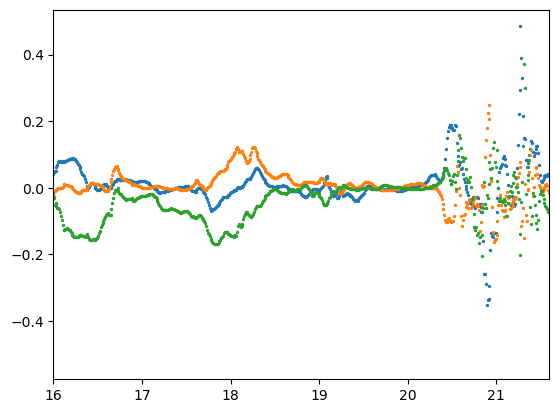

In [18]:
av = np.array([ax, ay, az])
axp, ayp, azp = r.apply(av.T, inverse=False).T
plt.scatter(test, axp, s=2, c='C0')
plt.scatter(test, ayp, s=2, c='C1')
plt.scatter(test, azp, s=2, c='C2')

plt.xlim(16, 21.6)
msk = ((16+16-21.6)<test)&(test <16)
print('pre-jump segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

msk = (16<test)&(test <21.6)
print('jump segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

msk = (28<test)&(test<(28+(21.6-16)))
print('spin segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

Suggests that a running std window on the de-rotated z or raw x will do the job, although possibly mean of abs is sufficient

Text(0, 0.5, 'absmean')

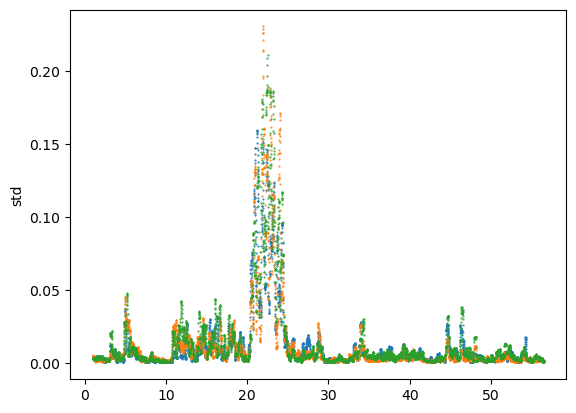

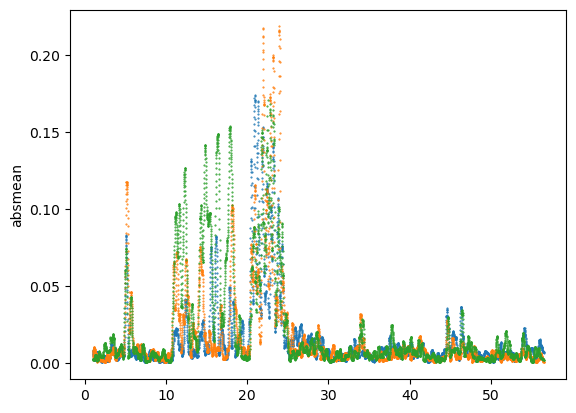

In [19]:
window_size = 21

av = np.array([ax, ay, az])
axp, ayp, azp = r.apply(av.T, inverse=False).T

plt.plot(test[window_size//2:-window_size//2+1], np.std(np.lib.stride_tricks.sliding_window_view(axp, window_size), axis=1), '.', ms=1)
plt.plot(test[window_size//2:-window_size//2+1], np.std(np.lib.stride_tricks.sliding_window_view(ayp, window_size), axis=1), '.', ms=1)
plt.plot(test[window_size//2:-window_size//2+1], np.std(np.lib.stride_tricks.sliding_window_view(azp, window_size), axis=1), '.', ms=1)
plt.ylabel('std')

plt.figure()
plt.plot(test[window_size//2:-window_size//2+1], np.mean(np.lib.stride_tricks.sliding_window_view(np.abs(axp), window_size), axis=1), '.', ms=1)
plt.plot(test[window_size//2:-window_size//2+1], np.mean(np.lib.stride_tricks.sliding_window_view(np.abs(ayp), window_size), axis=1), '.', ms=1)
plt.plot(test[window_size//2:-window_size//2+1], np.mean(np.lib.stride_tricks.sliding_window_view(np.abs(azp), window_size), axis=1), '.', ms=1)
plt.ylabel('absmean')

# Identify spinning

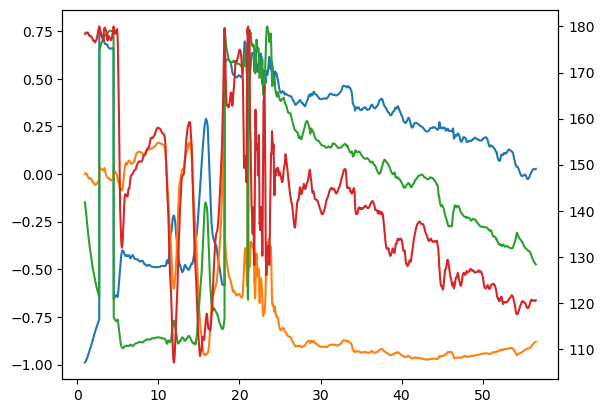

In [20]:
v = r.as_rotvec(degrees=True)
ang = np.linalg.norm(v, axis=1)
n = v.T/ang
nx, ny, nz = n

plt.figure()

plt.plot(test, nx)
plt.plot(test, ny)
plt.plot(test, nz)

plt.twinx()
plt.plot(test, ang, c='C3')

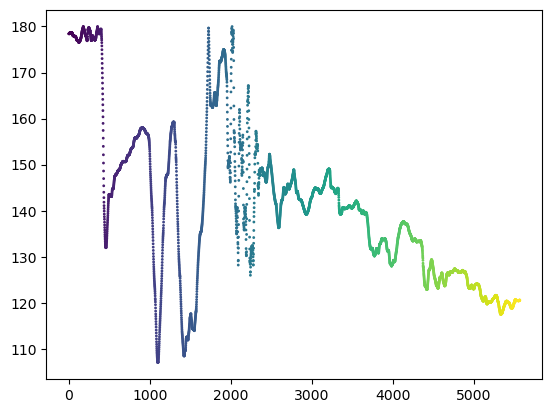

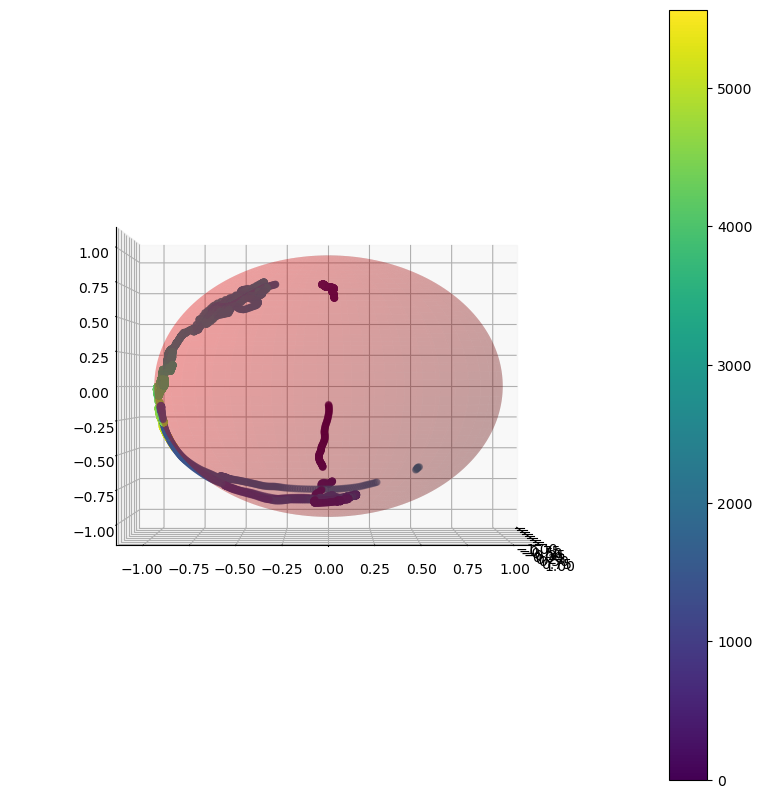

In [21]:
plt.scatter(np.arange(len(ang)), ang, c=np.arange(len(ang)), s=1)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, y, z, color='r', alpha=.2)

m = ax.scatter(nx, ny, nz, c=np.arange(len(nx)))
fig.colorbar(m)
ax.azim =  0
ax.elev = 0

Need to work out how the coordinate system is rotated w.r.t. the *original* z-axis?

$ \tan(\theta)= y/x, \theta = \arctan2(y, x)$

So need to rotate the z-axis into the rotated space, compute the above

In [22]:
import sympy
from sympy import symbols, Quaternion
x,y,z,w,qx,qy,qz,qw = symbols('x,y,z,w,q_x,q_y,q_z,q_w')


### active

In [23]:
qs = Quaternion(qw,qx,qy,qz) 
p = Quaternion(w, x, y, z)

r = (qs.conjugate()*p*qs).simplify()
rz = r.subs({w:0, x:0, y:0, z:1})
rz.c/rz.b

(2*q_w*q_x + 2*q_y*q_z)/(-2*q_w*q_y + 2*q_x*q_z)

(-15.0, 15.0)

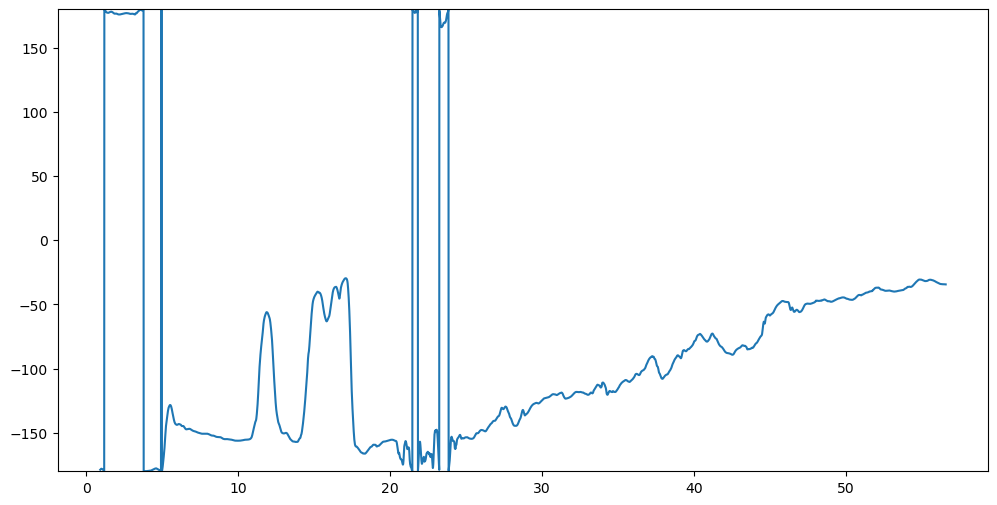

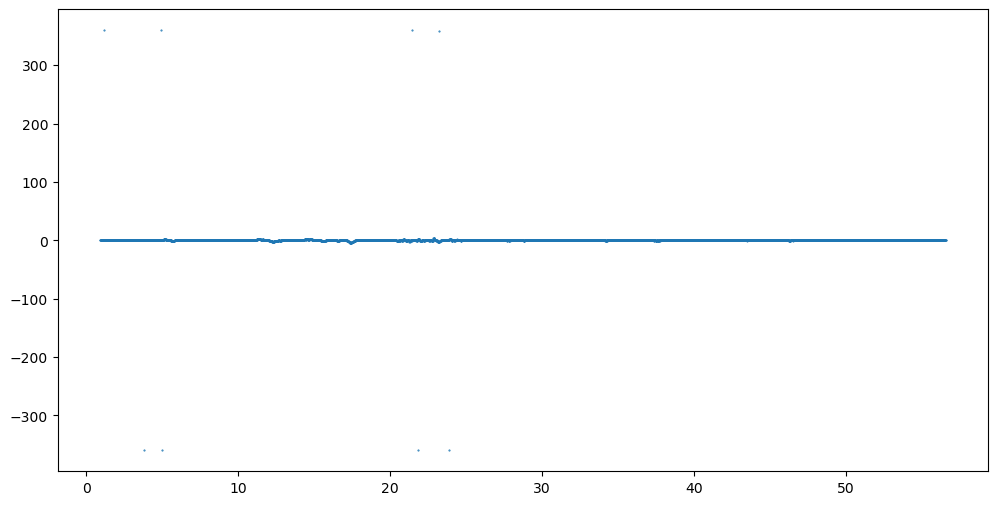

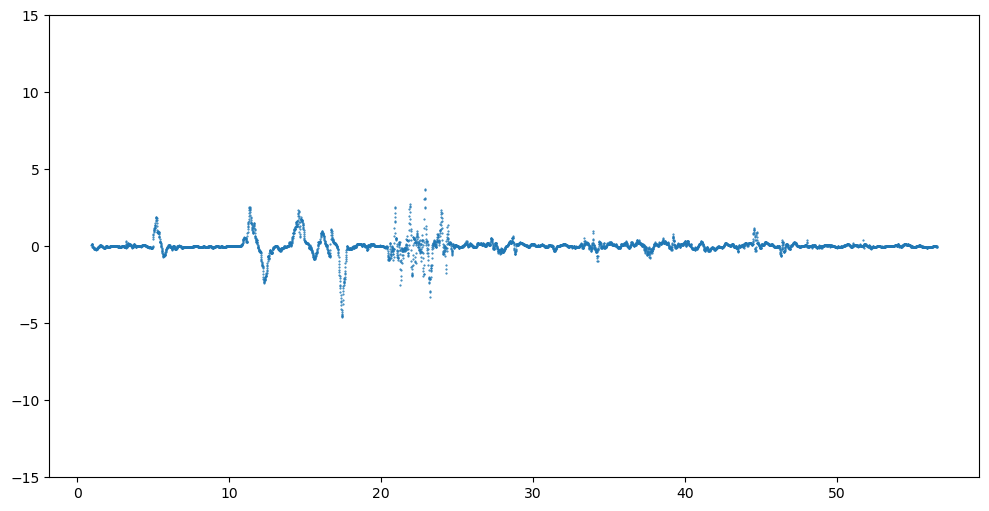

In [24]:
num = 2*(q[0]*q[1] + q[2]*q[3])
den = 2*(-q[0]*q[2] + q[1]*q[2])

ang = np.arctan2(num, den)
dang = np.degrees(ang)

plt.figure(figsize=(12, 6))
plt.plot(test, dang)
plt.ylim(-180, 180)

plt.figure(figsize=(12, 6))
plt.plot(test[:-1], np.diff(dang), '.', ms=1)

plt.figure(figsize=(12, 6))
plt.plot(test[:-1], np.diff(dang), '.', ms=1)
plt.ylim(-15,15)

### passive

In [25]:
qs = Quaternion(qw,qx,qy,qz) 
p = Quaternion(w, x, y, z)

r = (qs*p*qs.conjugate()).simplify()
rz = r.subs({w:0, x:0, y:0, z:1})
rz.c/rz.b

(-2*q_w*q_x + 2*q_y*q_z)/(2*q_w*q_y + 2*q_x*q_z)

(-15.0, 15.0)

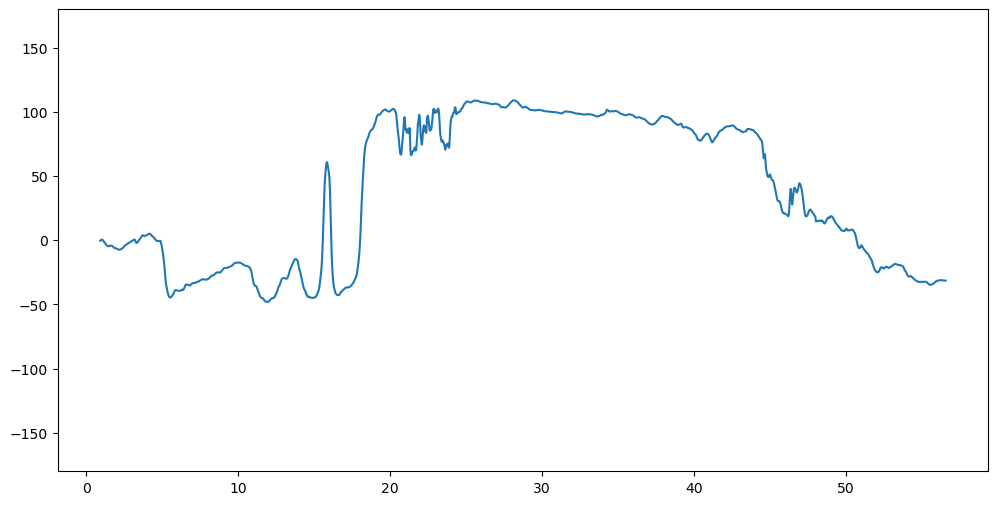

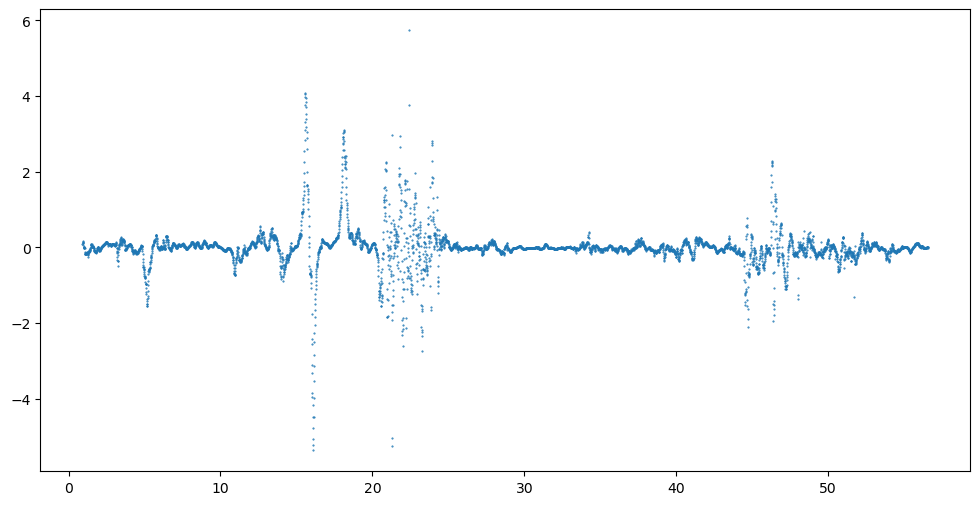

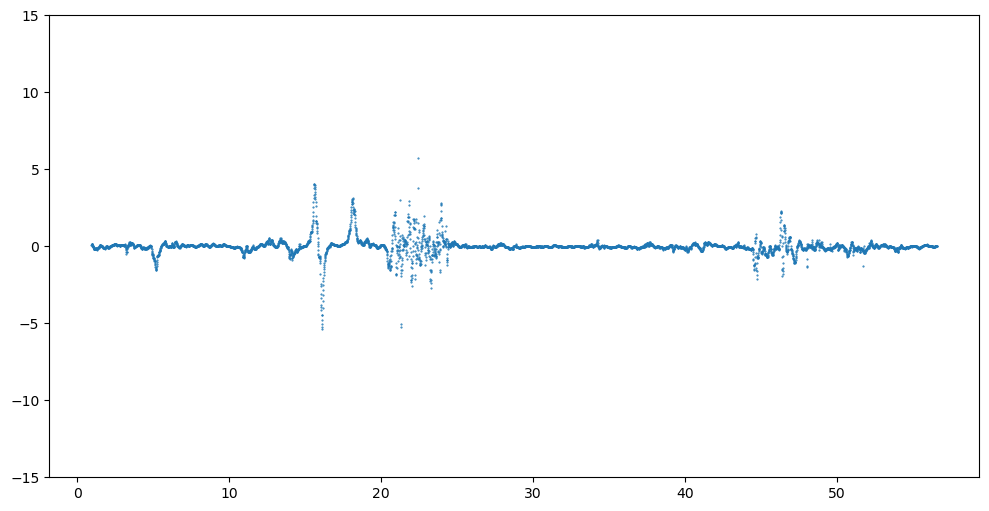

In [26]:
num = 2*(-q[0]*q[1] + q[2]*q[3])
den = 2*(q[0]*q[2] + q[1]*q[2])

ang = np.arctan2(num, den)
dang = np.degrees(ang)

plt.figure(figsize=(12, 6))
plt.plot(test, dang)
plt.ylim(-180, 180)

plt.figure(figsize=(12, 6))
plt.plot(test[:-1], np.diff(dang), '.', ms=1)

plt.figure(figsize=(12, 6))
plt.plot(test[:-1], np.diff(dang), '.', ms=1)
plt.ylim(-15,15)

Maybe if the average of the last 3 of the passive are above some threshold?

(Probably works better if the spin and jump cannot be combined?)